# Imports

In [1]:
import numpy as np
import os
import sys
import pickle
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import ScalarMappable

from pycirclize import Circos
from pycirclize.parser import Matrix

import networkx as nx

## Helper Functions

In [2]:
%store -r analysis_hf
sys.path.insert(0, analysis_hf)

import fixedDensity as fd
import chordPlot as cp

# Set Directory Paths

In [3]:
# Directory path to load formatted Layer Data
%store -r layer_dataDir

# Directory path to save Calcualted Analysis Data
%store -r layer_CalData

# Directory path to save Figures
%store -r layer_Fig

# Loading

## Loading Covariance Matrices

In [4]:
# cov_SMI32_dict
with open(os.path.join(layer_CalData, 'cov_SMI32_dict.pkl'), 'rb') as f:
    cov_SMI32_dict = pickle.load(f)
f.close()

# cov_SMI32_dict_w
with open(os.path.join(layer_CalData, 'cov_SMI32_dict_w.pkl'), 'rb') as f:
    cov_SMI32_dict_w = pickle.load(f)
f.close()

## Loading Log %AO Values

In [5]:
# NeuN_HC
with open(os.path.join(layer_dataDir, 'NeuN_HC.pkl'), 'rb') as f:
    NeuN_HC = pickle.load(f)
f.close()

# NeuN_TAU
with open(os.path.join(layer_dataDir, 'NeuN_TAU.pkl'), 'rb') as f:
    NeuN_TAU = pickle.load(f)
f.close()

# NeuN_TDP
with open(os.path.join(layer_dataDir, 'NeuN_TDP.pkl'), 'rb') as f:
    NeuN_TDP = pickle.load(f)
f.close()

# SMI32_HC
with open(os.path.join(layer_dataDir, 'SMI32_HC.pkl'), 'rb') as f:
    SMI32_HC = pickle.load(f)
f.close()

# SMI32_TAU
with open(os.path.join(layer_dataDir, 'SMI32_TAU.pkl'), 'rb') as f:
    SMI32_TAU = pickle.load(f)
f.close()

# SMI32_TDP
with open(os.path.join(layer_dataDir, 'SMI32_TDP.pkl'), 'rb') as f:
    SMI32_TDP = pickle.load(f)
f.close()

## Loading Layer Neuron Labels (SMI32)

In [6]:
SMI32_Labels = ['L23_1(Cingulate)', 'L23_2(Cingulate)', 'L23_3d(Paracingulate)', 'L23_3v(Paracingulate)', 'L23_4(Rectus)', 'L23_5(Middle Frontal)', 
               'L56_1(Cingulate)', 'L56_2(Cingulate)', 'L56_3d(Paracingulate)', 'L56_3v(Paracingulate)', 'L56_4(Rectus)', 'L56_5(Middle Frontal)']

# Sub-Track Condition

# Draw Graph Networks (SMI32)

## Define Variables

### Set fixed density value 

In [7]:
fd_val = 10

### Label Order

In [8]:
order = ['L23_5(Middle Frontal)',
         'L23_4(Rectus)',
         'L23_3v(Paracingulate)', 
         'L23_3d(Paracingulate)',
         'L23_2(Cingulate)',
         'L23_1(Cingulate)',
         'L56_1(Cingulate)',
         'L56_2(Cingulate)',
         'L56_3d(Paracingulate)',
         'L56_3v(Paracingulate)', 
         'L56_4(Rectus)',
         'L56_5(Middle Frontal)']

### Dataset to Use

In [9]:
# Variable setting
neuron_type = "SMI32"
val_type = 'Original'
cov_dict = cov_SMI32_dict
data_label = SMI32_Labels

In [10]:
# Set Node Sizes based on Log %AO values
HC_exp = SMI32_HC.copy()
TAU_exp = SMI32_TAU.copy()
TDP_exp = SMI32_TDP.copy()

# Get min/max %AO of LBD
minVal = np.nanmin(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())))
maxVal = np.nanmax(np.concatenate((HC_exp.flatten(), TAU_exp.flatten(), TDP_exp.flatten())) - minVal + 0.0015, axis=0)

scale = 700

# Apply a transformation to create a more dramatic difference in node sizes
def transform_values(values, min_val, max_val, scale):
    # Normalize the values
    normalized = (values - min_val) / max_val
    # Apply an exponential transformation
    transformed = np.exp(normalized) - 1  # subtracting 1 to bring the minimum back to 0
    # Scale the transformed values
    return scale * transformed

# Size of Nodes
markerVecHC = np.nanmean(HC_exp, axis=0)
markerVecHC = transform_values(markerVecHC, minVal, maxVal, scale)

markerVecTAU = np.nanmean(TAU_exp, axis=0)
markerVecTAU = transform_values(markerVecTAU, minVal, maxVal, scale)

markerVecTDP = np.nanmean(TDP_exp, axis=0)
markerVecTDP = transform_values(markerVecTDP, minVal, maxVal, scale)

## HC > TAU

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

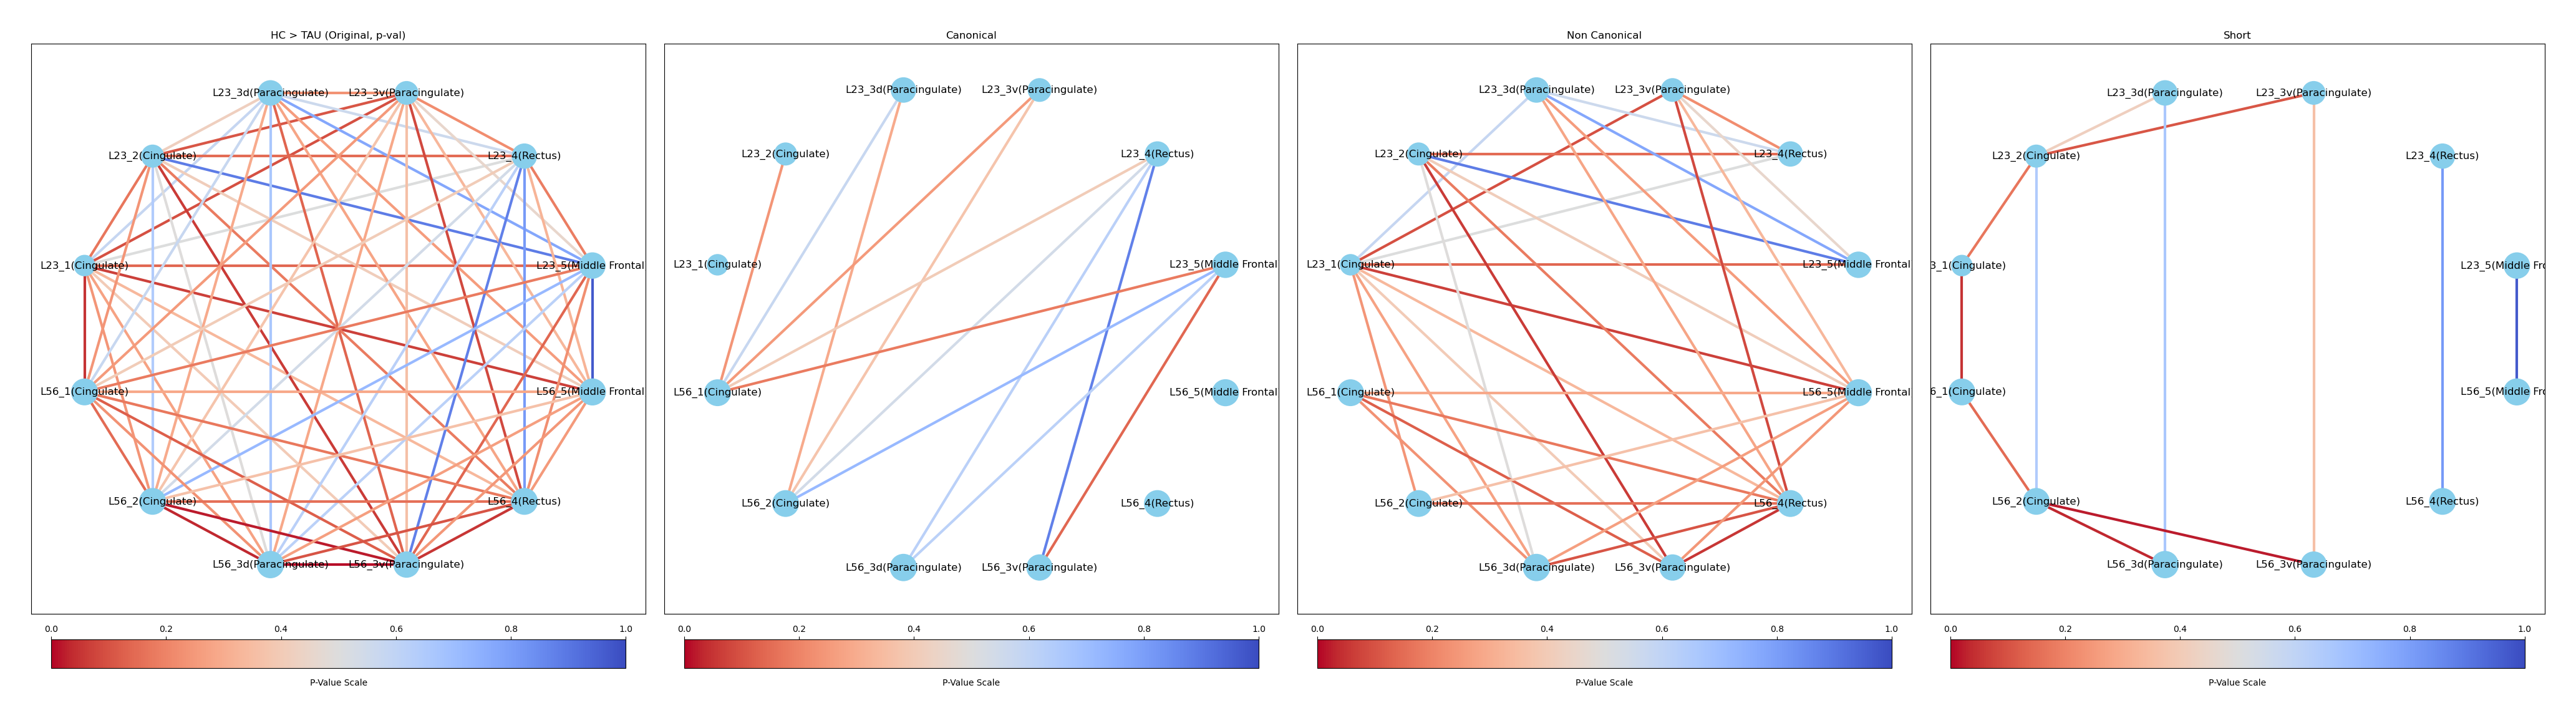

In [11]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, f'HC > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TAU_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()



## TAU > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

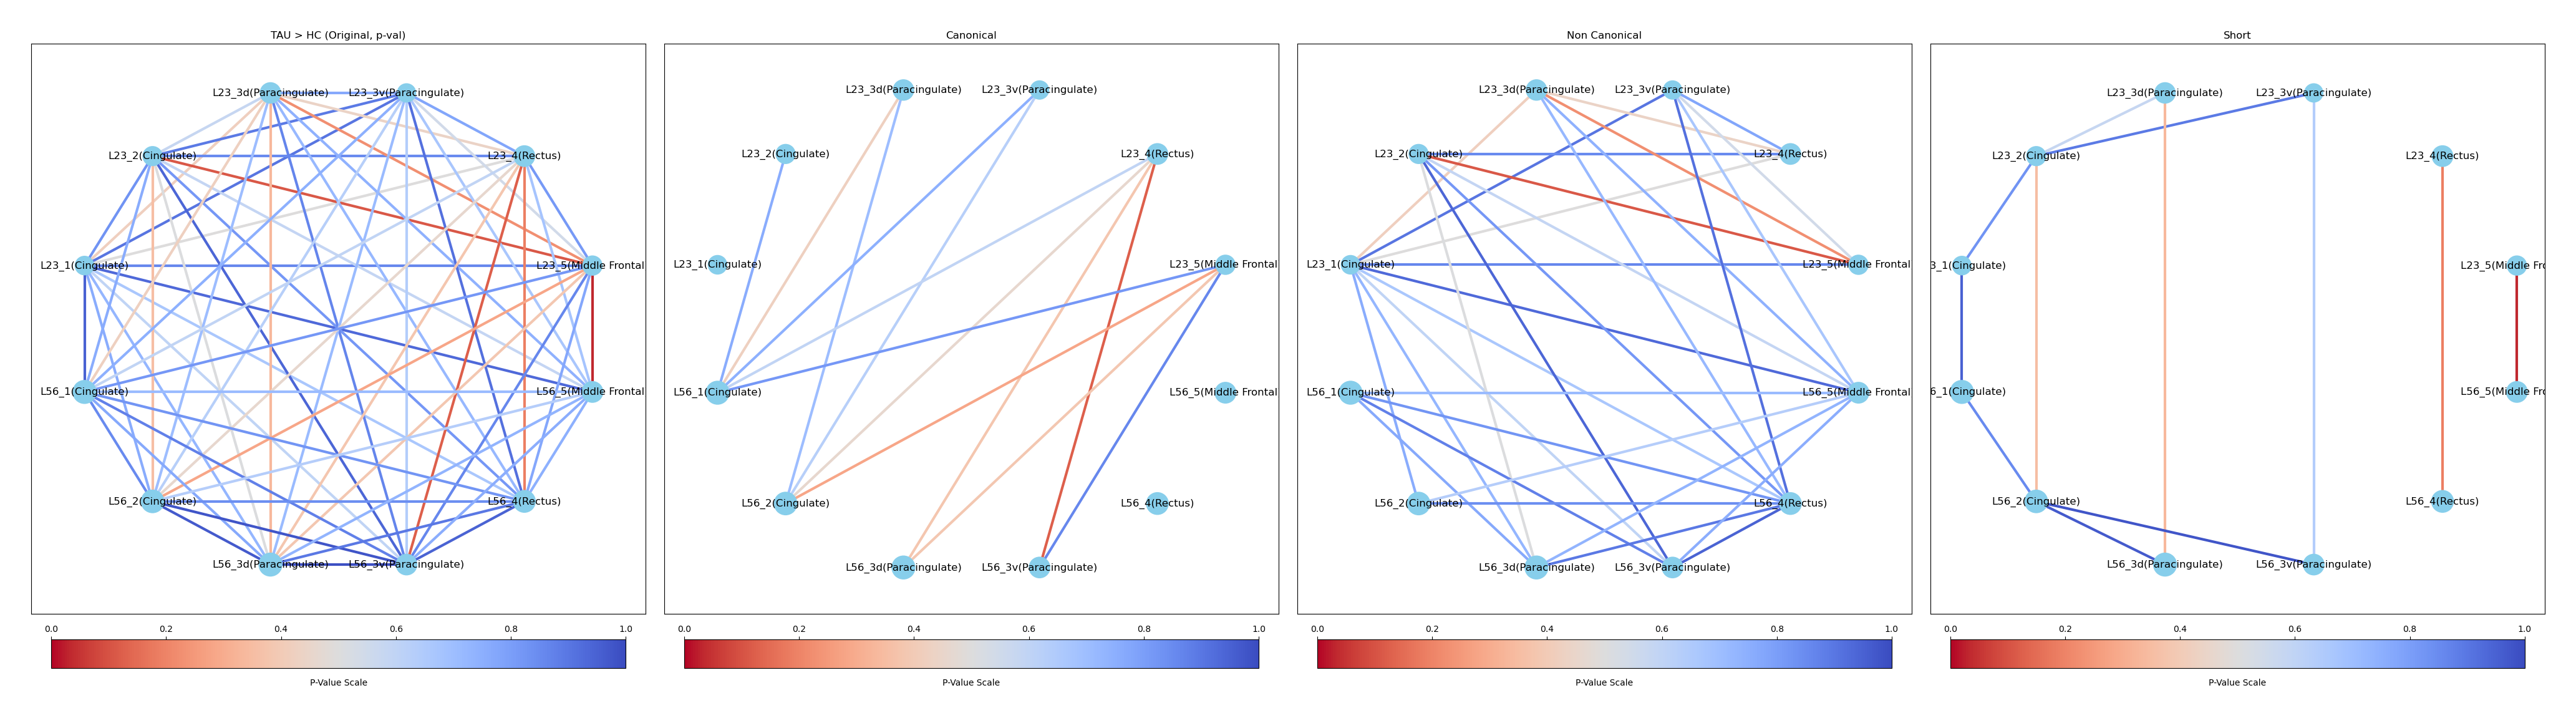

In [12]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, f'TAU > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## HC > TDP

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

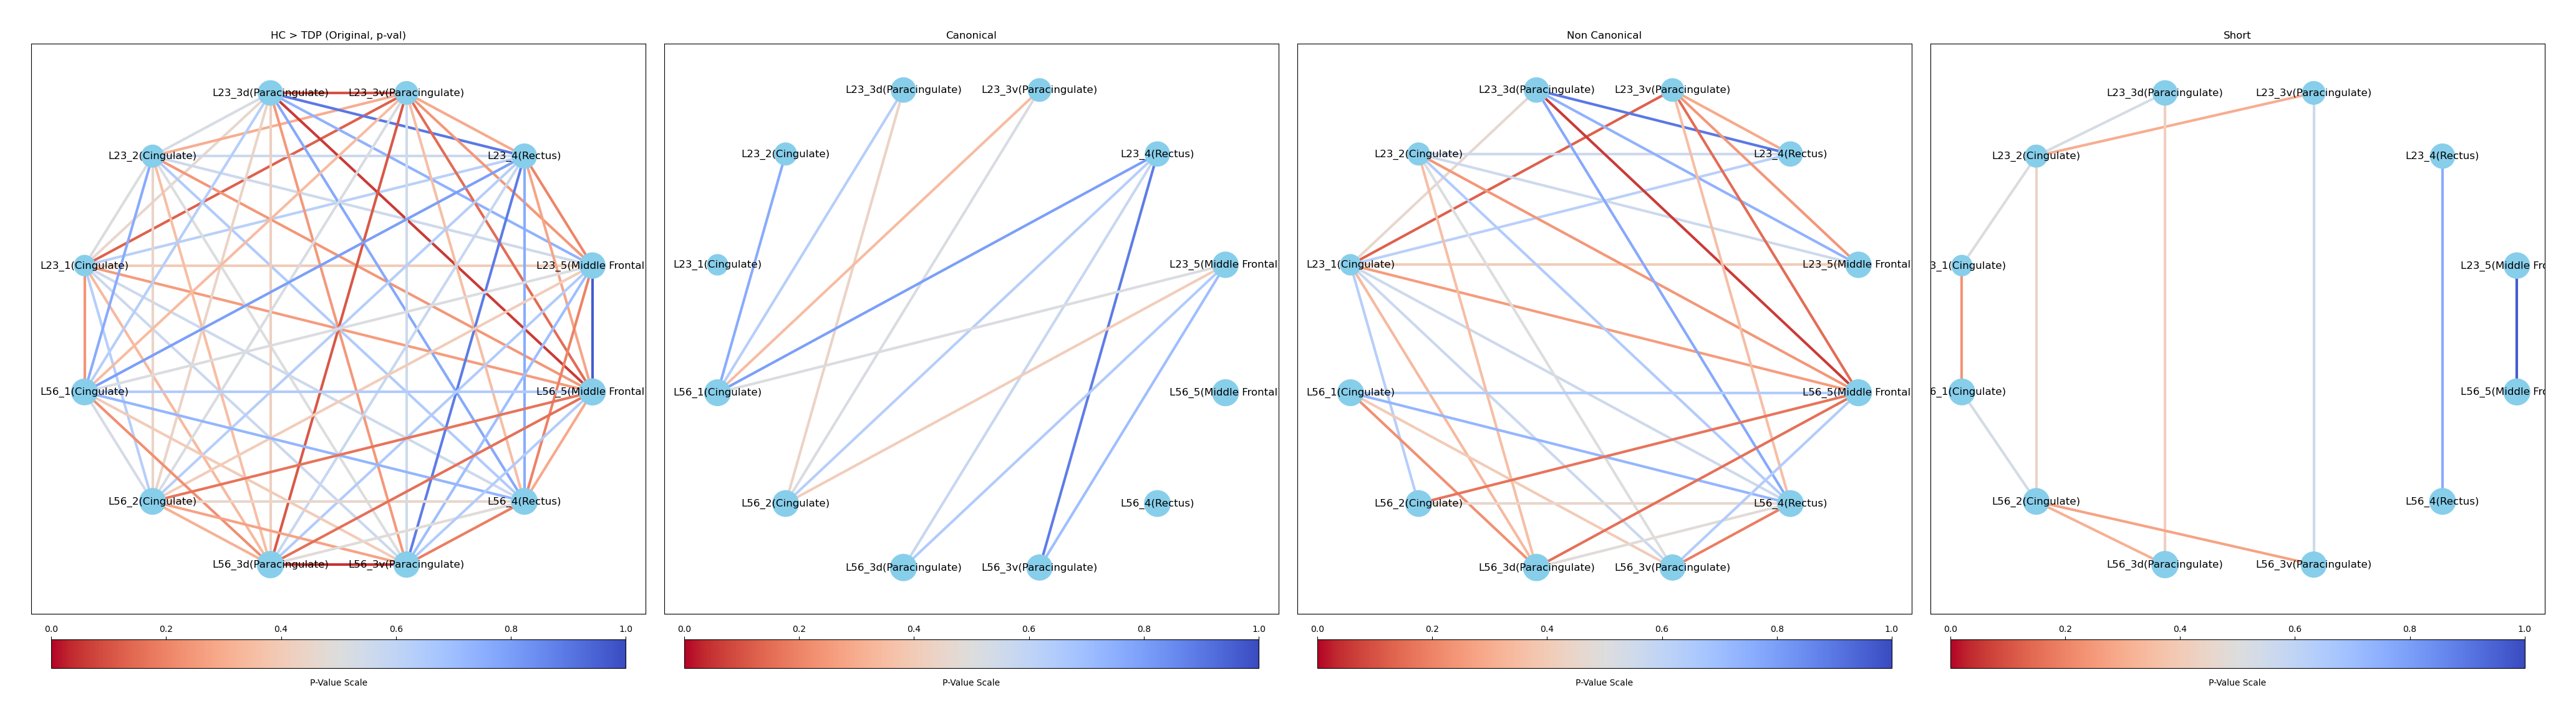

In [13]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, f'HC > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecHC)
cp.chordPlotRaw(cov_dict['TDP_lt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecHC)

plt.savefig(layer_Fig + f'/SMI32_HC > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > HC

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

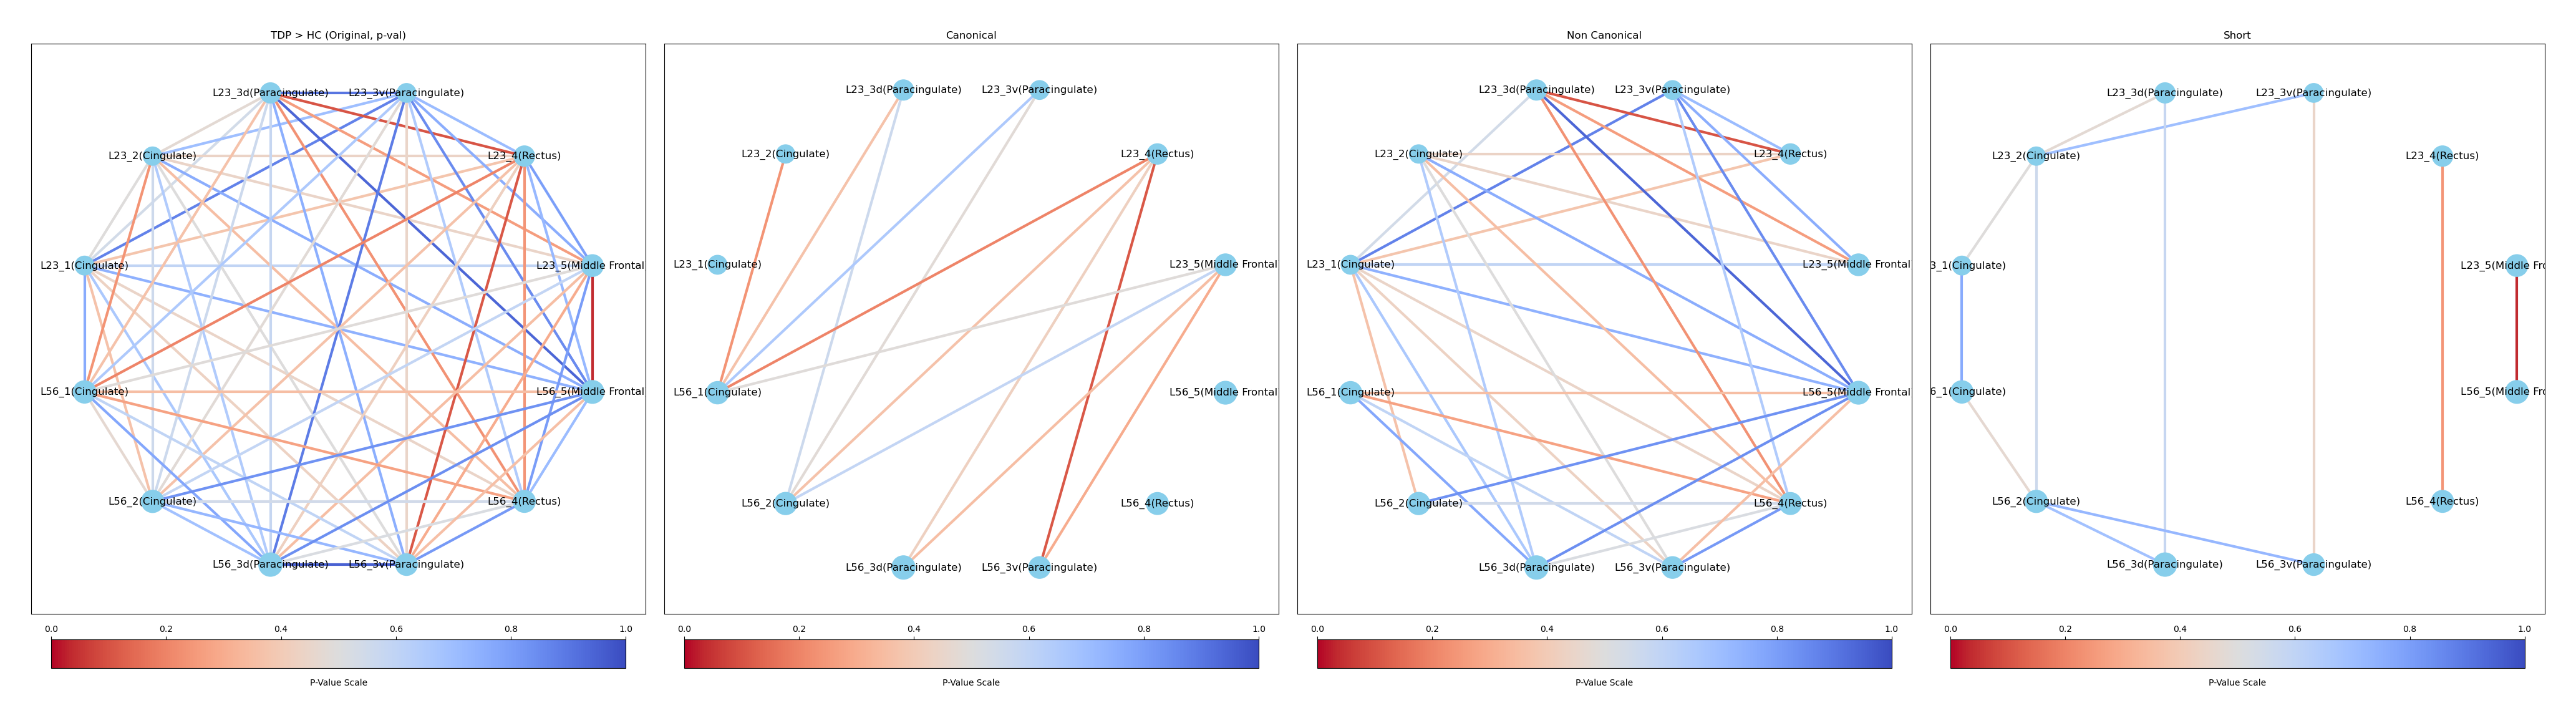

In [14]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, f'TDP > HC ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_HC_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > HC ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TAU > TDP

In [15]:
pd.DataFrame(cov_dict['TAU_gt_TDP_raw'])

0         1         2         3         4         5         6   \
0        NaN  0.853768  0.372332  0.636323  0.618678  0.848948  0.865826   
1   0.853768       NaN  0.608234  0.794621  0.908691  0.090921  0.924304   
2   0.372332  0.608234       NaN  0.339837  0.866331  0.421266  0.549440   
3   0.636323  0.794621  0.339837       NaN  0.628228  0.309235  0.631287   
4   0.618678  0.908691  0.866331  0.628228       NaN  0.568498  0.860861   
5   0.848948  0.090921  0.421266  0.309235  0.568498       NaN  0.864649   
6   0.865826  0.924304  0.549440  0.631287  0.860861  0.864649       NaN   
7   0.859102  0.289370  0.668066  0.639795  0.581420  0.171754  0.886525   
8   0.597881  0.363495  0.250824  0.303003  0.446648  0.525161  0.518918   
9   0.654682  0.939885  0.699008  0.676724  0.435802  0.947148  0.829530   
10  0.729585  0.916230  0.919656  0.856384  0.381606  0.494073  0.948711   
11  0.856283  0.312871  0.149224  0.321918  0.466113  0.397201  0.856348   

          7         8         9         10        11  
0   0.859102  0.597881  0.654682  0.729585  0.856283  
1   0.289370  0.363495  0.939885  0.916230  0.312871  
2   0.668066  0.250824  0.699008  0.919656  0.149224  
3   0.639795  0.303003  0.676724  0.856384  0.321918  
4   0.581420  0.446648  0.435802  0.381606  0.466113  
5   0.171754  0.525161  0.947148  0.494073  0.397201  
6   0.886525  0.518918  0.829530  0.948711  0.856348  
7        NaN  0.934237  0.938202  0.843500  0.261246  
8   0.934237       NaN  0.816260  0.914247  0.346798  
9   0.938202  0.816260       NaN  0.810211  0.854135  
10  0.843500  0.914247  0.810211       NaN  0.578260  
11  0.261246  0.346798  0.854135  0.578260       NaN

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

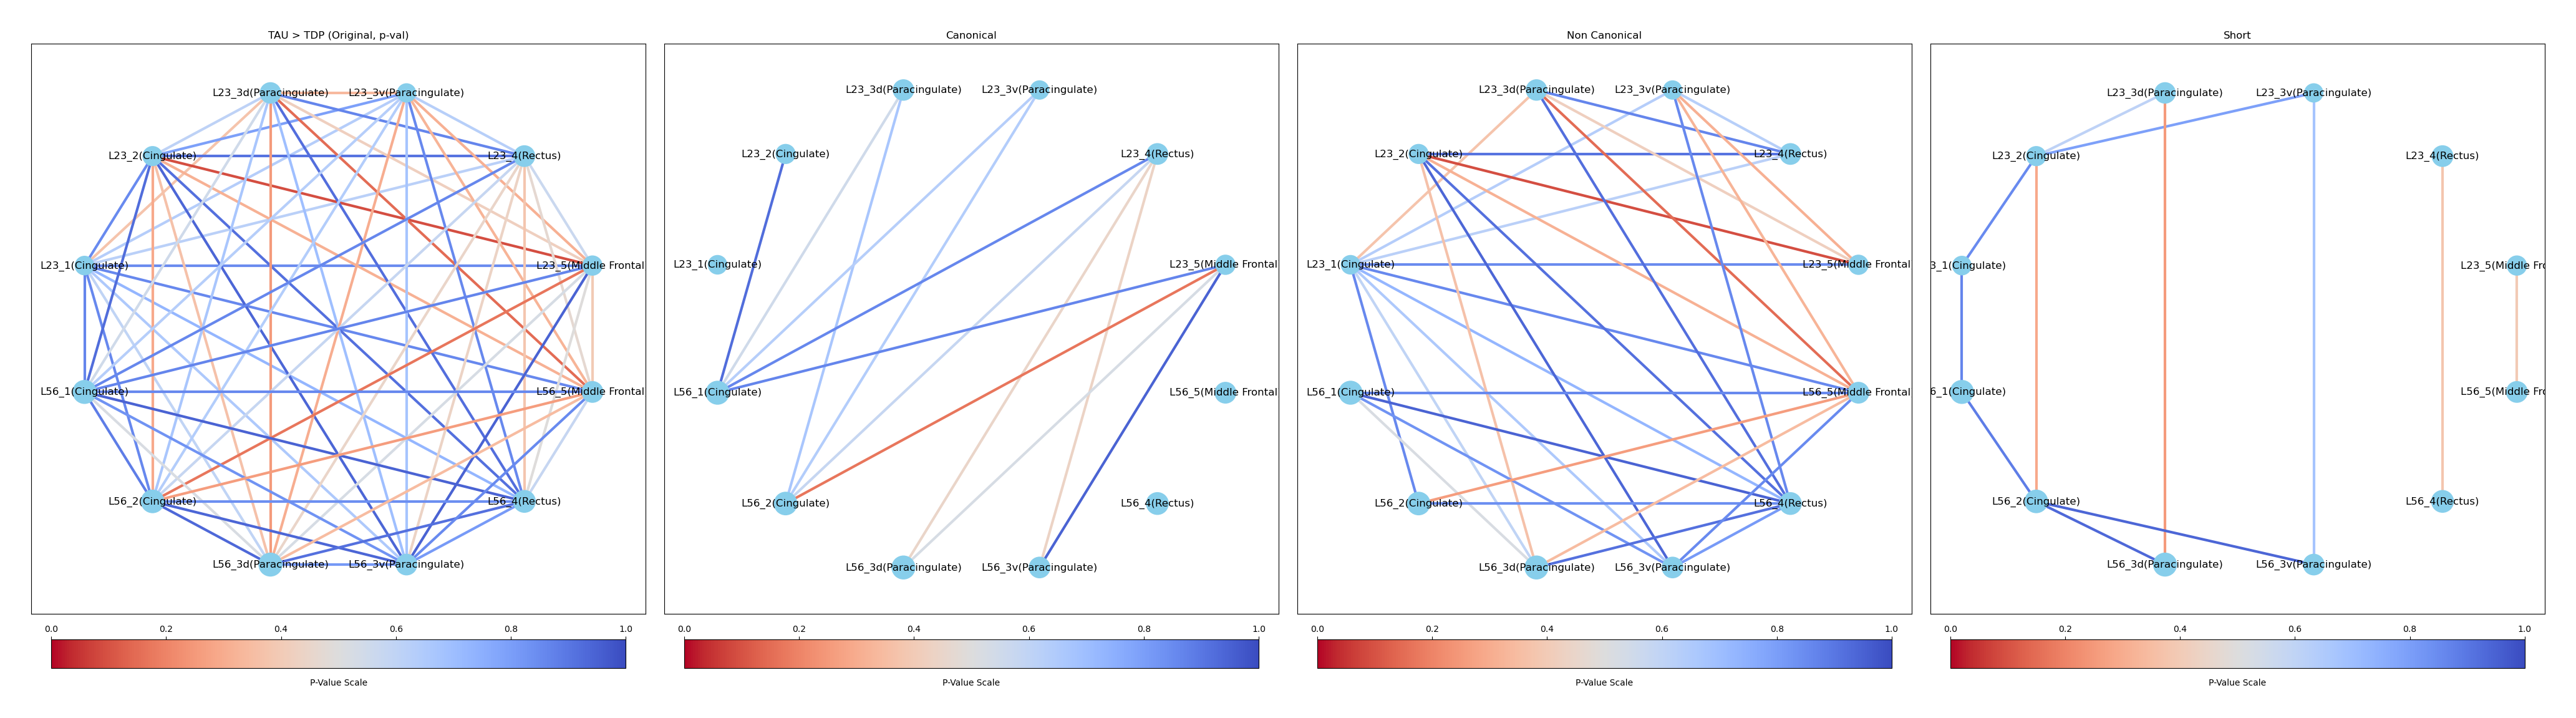

In [16]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, f'TAU > TDP ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTAU)
cp.chordPlotRaw(cov_dict['TAU_gt_TDP_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTAU)

plt.savefig(layer_Fig + f'/SMI32_TAU > TDP ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()

## TDP > TAU

In [18]:
pd.DataFrame(cov_dict['TDP_gt_TAU_raw'], index=data_label, columns=data_label)

L23_1(Cingulate)  L23_2(Cingulate)  \
L23_1(Cingulate)               0.000000          0.146232   
L23_2(Cingulate)               0.146232          0.000000   
L23_3d(Paracingulate)          0.627668          0.391766   
L23_3v(Paracingulate)          0.363677          0.205379   
L23_4(Rectus)                  0.381322          0.091309   
L23_5(Middle Frontal)          0.151052          0.909079   
L56_1(Cingulate)               0.134174          0.075696   
L56_2(Cingulate)               0.140898          0.710630   
L56_3d(Paracingulate)          0.402119          0.636505   
L56_3v(Paracingulate)          0.345318          0.060115   
L56_4(Rectus)                  0.270415          0.083770   
L56_5(Middle Frontal)          0.143717          0.687129   

                       L23_3d(Paracingulate)  L23_3v(Paracingulate)  \
L23_1(Cingulate)                    0.627668               0.363677   
L23_2(Cingulate)                    0.391766               0.205379   
L23_3d(Paracingulate)               0.000000               0.660163   
L23_3v(Paracingulate)               0.660163               0.000000   
L23_4(Rectus)                       0.133669               0.371772   
L23_5(Middle Frontal)               0.578734               0.690765   
L56_1(Cingulate)                    0.450560               0.368713   
L56_2(Cingulate)                    0.331934               0.360205   
L56_3d(Paracingulate)               0.749176               0.696997   
L56_3v(Paracingulate)               0.300992               0.323276   
L56_4(Rectus)                       0.080344               0.143616   
L56_5(Middle Frontal)               0.850776               0.678082   

                       L23_4(Rectus)  L23_5(Middle Frontal)  L56_1(Cingulate)  \
L23_1(Cingulate)            0.381322               0.151052          0.134174   
L23_2(Cingulate)            0.091309               0.909079          0.075696   
L23_3d(Paracingulate)       0.133669               0.578734          0.450560   
L23_3v(Paracingulate)       0.371772               0.690765          0.368713   
L23_4(Rectus)               0.000000               0.431502          0.139139   
L23_5(Middle Frontal)       0.431502               0.000000          0.135351   
L56_1(Cingulate)            0.139139               0.135351          0.000000   
L56_2(Cingulate)            0.418580               0.828246          0.113475   
L56_3d(Paracingulate)       0.553352               0.474839          0.481082   
L56_3v(Paracingulate)       0.564198               0.052852          0.170470   
L56_4(Rectus)               0.618394               0.505927          0.051289   
L56_5(Middle Frontal)       0.533887               0.602799          0.143652   

                       L56_2(Cingulate)  L56_3d(Paracingulate)  \
L23_1(Cingulate)               0.140898               0.402119   
L23_2(Cingulate)               0.710630               0.636505   
L23_3d(Paracingulate)          0.331934               0.749176   
L23_3v(Paracingulate)          0.360205               0.696997   
L23_4(Rectus)                  0.418580               0.553352   
L23_5(Middle Frontal)          0.828246               0.474839   
L56_1(Cingulate)               0.113475               0.481082   
L56_2(Cingulate)               0.000000               0.065763   
L56_3d(Paracingulate)          0.065763               0.000000   
L56_3v(Paracingulate)          0.061798               0.183740   
L56_4(Rectus)                  0.156500               0.085753   
L56_5(Middle Frontal)          0.738754               0.653202   

                       L56_3v(Paracingulate)  L56_4(Rectus)  \
L23_1(Cingulate)                    0.345318       0.270415   
L23_2(Cingulate)                    0.060115       0.083770   
L23_3d(Paracingulate)               0.300992       0.080344   
L23_3v(Paracingulate)               0.323276       0.143616   
L23_4(Rectus)                       0.564198       0.618394   
L23_5(Middle F

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

<Figure size 1300x1300 with 0 Axes>

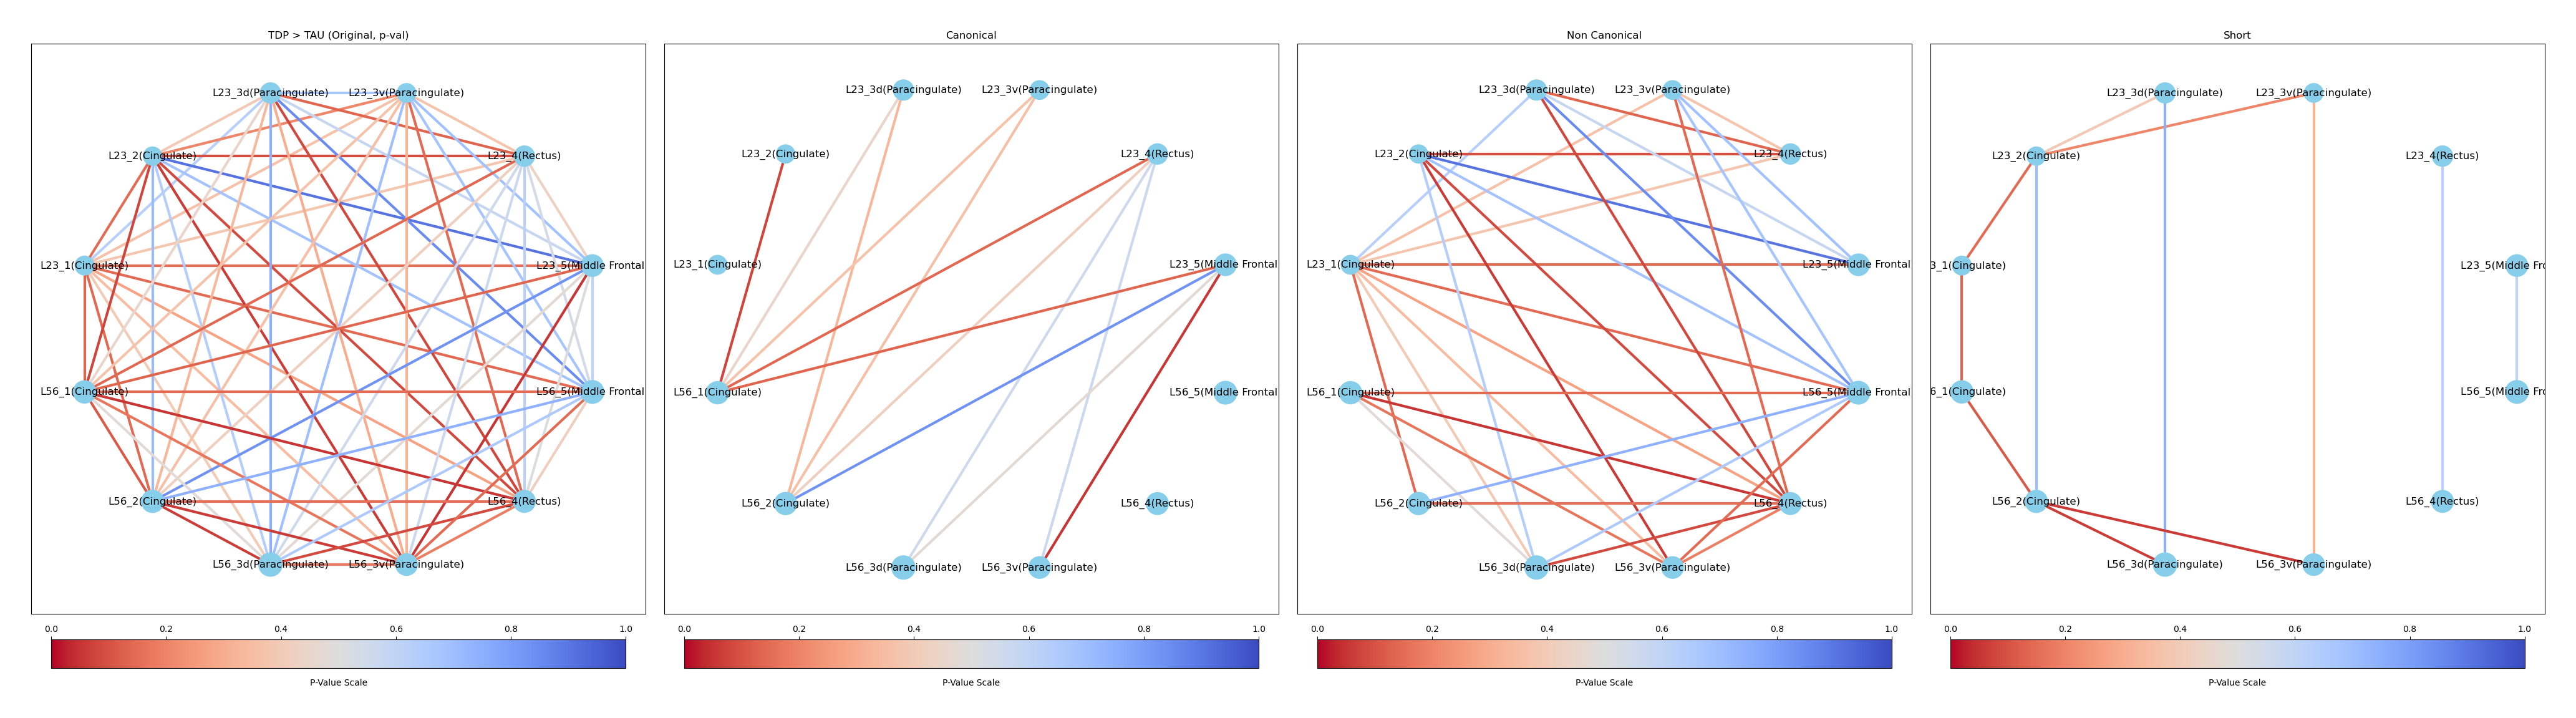

In [17]:
# Create a new figure with a single row and four columns
fig, axs = plt.subplots(1, 4, figsize=(52, 13))  # Adjust the figsize as needed

# Reduce the space between subplots
fig.subplots_adjust(wspace=0.03)  

# Draw each plot in its respective subplot
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, f'TDP > TAU ({val_type}, p-val)', 'cmp', ax=axs[0], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Canonical', 'cmp', sub_path=True, sub_path_type='canonical', ax=axs[1], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Non Canonical', 'cmp', sub_path=True, sub_path_type='noncanonical', ax=axs[2], markerVec=markerVecTDP)
cp.chordPlotRaw(cov_dict['TDP_gt_TAU_raw'], data_label, 'Short', 'cmp', sub_path=True, sub_path_type='short', ax=axs[3], markerVec=markerVecTDP)

plt.savefig(layer_Fig + f'/SMI32_TDP > TAU ({val_type}, p-val).png')

# Show or save the final concatenated figure
plt.show()